In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import kesi
import logging
logging.basicConfig(level=logging.INFO)
import os
import operator

In [2]:
from kesi._verbose import (VerboseFFR,
                           LinearMixture,
                           LoadableVerboseFFR)
from kesi._engine import _LinearKernelSolver

import FEM.fem_slice_point_new as fspn
import FEM.fem_common as fc

In [3]:
MeasurementManagerBase = VerboseFFR.MeasurementManagerBase


class MeasurementManager(MeasurementManagerBase):
    def __init__(self, ELECTRODES, space='potential'):
        self._space = space
        self._ELECTRODES = ELECTRODES
        self.number_of_measurements = len(ELECTRODES)
    def probe(self, field):
        return getattr(field, 
                       self._space)(self._ELECTRODES.X,
                                    self._ELECTRODES.Y,
                                    self._ELECTRODES.Z)

In [4]:
def load_degenerated_source_factory(path, np_path, ELECTRODES):
    #np_path = path + '.npz'
    logging.info(f'PROCESSING: {np_path}')
    if os.path.exists(np_path):
        logging.info(' FOUND')
        return fc.DegeneratedRegularSourcesFactory.load(np_path)
    print('Not found')
    try:
        print('1')
        sources = fc.DecompressedSourcesXY(fspn.PointSourceFactoryINI(path + '.ini'))
        print('here')
        degenerated_source_factory = fc.DegeneratedRegularSourcesFactory.from_sources(sources, ELECTRODES)
        print('hi')
        degenerated_source_factory.save(np_path)
    except ZeroDivisionError as e:
        logging.error(f' ERROR: {e}')
        return None
    
    else:
        logging.info(' CREATED')
        return degenerated_source_factory

In [5]:
def gauss_function(X, Y, Z):
    variance = standard_deviation ** 2
    a = (2 * np.pi * variance) ** -1.5
    return a * np.exp(-0.5 * ((X - x) ** 2 + (Y - y) ** 2 + (Z - z) ** 2) / variance)

In [33]:
ELE_X, ELE_Y, ELE_Z = np.meshgrid(np.linspace(-1.5e-04, 1.5e-04, 8),
                                  np.linspace(-1.5e-04, 1.5e-04, 8),
                                  [0],
                                  indexing='ij')
ELECTRODES = np.transpose([ELE_X.flatten(),
                           ELE_Y.flatten(),
                           ELE_Z.flatten()])

In [34]:
ELECTRODES.shape

(64, 3)

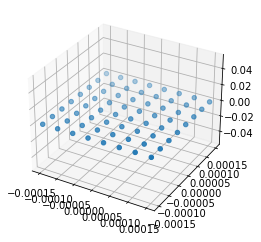

In [35]:
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(ELECTRODES[:, 0], ELECTRODES[:, 1], ELECTRODES[:, 2])

In [9]:
degenerated_factory = load_degenerated_source_factory('/home/mbejtka/FEM/kESI/extras/FEM/solutions/finite_slice_composite/2/6_degenerate', '/home/mbejtka/FEM/kESI/extras/FEM/solutions/finite_slice_composite/2/6_degenerate.npz', ELECTRODES)

INFO:root:PROCESSING: /home/mbejtka/FEM/kESI/extras/FEM/solutions/finite_slice_composite/2/6_degenerate.npz
INFO:root: FOUND


In [36]:
degenerated_factory_64plate = load_degenerated_source_factory('/home/mbejtka/FEM/kESI/extras/FEM/solutions/finite_slice_composite/2/6/6', '/home/mbejtka/FEM/kESI/extras/FEM/solutions/finite_slice_composite/2/6_64onPlate.npz', ELECTRODES)

INFO:root:PROCESSING: /home/mbejtka/FEM/kESI/extras/FEM/solutions/finite_slice_composite/2/6_64onPlate.npz


Not found
1
here
hi


INFO:root: CREATED


In [30]:
degenerated_factory.ELECTRODES[:, 2].max()

0.0002976923076923077

In [32]:
degenerated_factory.X.max()

0.00015

In [24]:
ele_plate = degenerated_factory.ELECTRODES[np.where(degenerated_factory.ELECTRODES[:, 2] < 0.00001)[0], :]

In [25]:
ele_plate.shape

(36, 3)

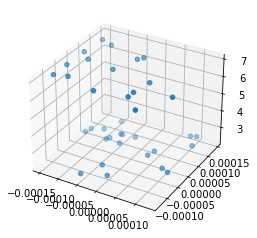

In [26]:
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(ele_plate[:, 0], ele_plate[:, 1], ele_plate[:, 2])

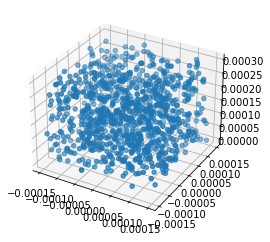

In [15]:
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(degenerated_factory.ELECTRODES[:, 0], degenerated_factory.ELECTRODES[:, 1], degenerated_factory.ELECTRODES[:, 2])

In [ ]:
#degenerated_factory_64plate.save('/home/mbejtka/FEM/kESI/extras/FEM/solutions/finite_slice/2/6_64ele_4x4x4')

In [38]:
integrated_factory = fc.DegeneratedIntegratedSourcesFactory.load_from_degenerated_sources_factory('/home/mbejtka/FEM/kESI/extras/FEM/solutions/finite_slice_composite/2/6_64onPlate.npz')

In [39]:
integrated_factory.ELECTRODES

array([[-1.50000000e-04, -1.50000000e-04,  0.00000000e+00],
       [-1.50000000e-04, -1.07142857e-04,  0.00000000e+00],
       [-1.50000000e-04, -6.42857143e-05,  0.00000000e+00],
       [-1.50000000e-04, -2.14285714e-05,  0.00000000e+00],
       [-1.50000000e-04,  2.14285714e-05,  0.00000000e+00],
       [-1.50000000e-04,  6.42857143e-05,  0.00000000e+00],
       [-1.50000000e-04,  1.07142857e-04,  0.00000000e+00],
       [-1.50000000e-04,  1.50000000e-04,  0.00000000e+00],
       [-1.07142857e-04, -1.50000000e-04,  0.00000000e+00],
       [-1.07142857e-04, -1.07142857e-04,  0.00000000e+00],
       [-1.07142857e-04, -6.42857143e-05,  0.00000000e+00],
       [-1.07142857e-04, -2.14285714e-05,  0.00000000e+00],
       [-1.07142857e-04,  2.14285714e-05,  0.00000000e+00],
       [-1.07142857e-04,  6.42857143e-05,  0.00000000e+00],
       [-1.07142857e-04,  1.07142857e-04,  0.00000000e+00],
       [-1.07142857e-04,  1.50000000e-04,  0.00000000e+00],
       [-6.42857143e-05, -1.50000000e-04

In [40]:
measurement_manager = integrated_factory.measurement_manager()

In [41]:
measurement_manager.number_of_measurements

64

In [42]:
X, Y, Z = map(operator.methodcaller('flatten'),
              #np.meshgrid(np.linspace(-3e-4, 3e-4, 15),
              #        [0],
              #        np.linspace(0, 3e-4, 15),
              #        indexing='ij'))
              np.meshgrid(np.linspace(-1.45e-4, 1.45e-4, 30),
                          np.linspace(-1.45e-4, 1.45e-4, 30),
                          np.linspace(0.05e-4, 2.95e-4, 30),
                          indexing='ij'))

In [43]:
SD = np.full(X.shape, 1.5e-5)
AMPLITUDE = np.ones_like(X)

In [44]:
gaussian_factory = fc.LoadableGaussians3D(X, Y, Z, SD, AMPLITUDE)

In [45]:
gaussians = list(gaussian_factory)

In [48]:
g = gaussians[5]

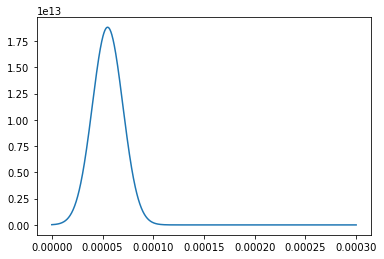

In [49]:
XX = np.linspace(0, 3e-4, 1000)
YY = g(g.x, g.y, XX)
plt.plot(XX, YY)

In [50]:
integrated_factory(g, vectorization_level=integrated_factory.VECTOR_INTEGRATE_YZ)

In [51]:
LoadableBaseFunctions = integrated_factory.LoadableIntegratedSourcess(fc.LoadableGaussians3D)

In [52]:
def base_functions_factory():
    return LoadableBaseFunctions.from_factories(gaussian_factory, 
                                                integrated_factory,
                                                vectorization_level=integrated_factory.VECTOR_INTEGRATE_YZ)

In [53]:
%time integrated_gaussians_factory = base_functions_factory()

CPU times: user 29min 52s, sys: 918 ms, total: 29min 53s
Wall time: 29min 53s


In [54]:
integrated_gaussians_factory.save('/home/mbejtka/FEM/kESI/extras/validation/results/slice_composite_integrated_gaussians_factory_64onPlate.npz')

In [55]:
integrated_gaussians_factory_new = LoadableBaseFunctions.load('/home/mbejtka/FEM/kESI/extras/validation/results/slice_composite_integrated_gaussians_factory_64onPlate.npz')

In [56]:
sources = list(integrated_gaussians_factory_new)

In [57]:
len(sources)

27000

In [58]:
# Estimating points    
r = 1.5e-4
X, Y, Z = np.meshgrid(np.linspace(-r, r, 20),
                      np.linspace(-r, r, 20),
                      np.linspace(0, 2*r, 20))
EST_POINTS =pd.DataFrame({'X': X.flatten(),
                          'Y': Y.flatten(),
                          'Z': Z.flatten()})

In [59]:
import validation.validation_functions as vf
import validation.plotting_functions as pf

In [60]:
measurement_manager_basis = vf.MeasurementManager(EST_POINTS, space='csd')

In [61]:
measurement_manager_basis.number_of_measurements

8000

In [62]:
potential = [measurement_manager.probe(source) for source in sources]

In [63]:
true_csd = [measurement_manager_basis.probe(source) for source in sources]

In [64]:
import time
import datetime
import sys

In [65]:
def makemydir(directory):
    """
    Creates directory if it doesn't exist
    """
    try:
        os.makedirs(directory)
    except OSError:
        pass
    os.chdir(directory)

In [66]:
start_time = time.time()
now = datetime.datetime.today() 
nTime = now.strftime('%Y-%m-%d_%H-%M-%S')
save_path = '/home/mbejtka/FEM/kESI/extras/validation' + '/results/' + nTime
makemydir(save_path)
forward_model = 'slice_composite'

In [67]:
# Create reconstructor
reconstructor_filename = save_path +'/Reconstructor.npz'
reconstructor = VerboseFFR(sources, measurement_manager)
reconstructor.save(reconstructor_filename)
print("Reconstructor --- %s seconds ---" % (time.time() - start_time))

Reconstructor --- 19.723329544067383 seconds ---


In [68]:
measurement_manager.number_of_measurements

64

In [69]:
loadable_reconstructor = LoadableVerboseFFR(reconstructor_filename, sources, measurement_manager)
kernel = loadable_reconstructor.kernel
cross_kernel = loadable_reconstructor.get_kernel_matrix(measurement_manager_basis)
cross_reconstructor = loadable_reconstructor._CrossKernelReconstructor(_LinearKernelSolver(kernel), cross_kernel)

In [70]:
cross_reconstructor_filename = save_path + '/CrossReconstructor.npz'
cross_reconstructor.save(cross_reconstructor_filename)

In [71]:
eigensources, eigenvalues, eigenvectors = vf.calculate_eigensources(kernel, cross_kernel, regularization_parameter=0)

In [72]:
eigensources.shape

(8000, 64)

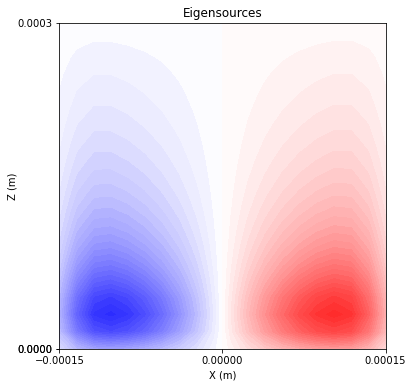

In [75]:
nr_component = 2
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
t_max = np.max(abs(eigensources[:, nr_component]))
pf.make_subplot(ax, eigensources[:, nr_component].reshape(X.shape), 'csd', X, Y, Z, t_max, idx=4, fig_title='Eigensources')

In [83]:
src_nr = 200
projection = vf.csd_into_eigensource_projection(true_csd[src_nr], eigensources)

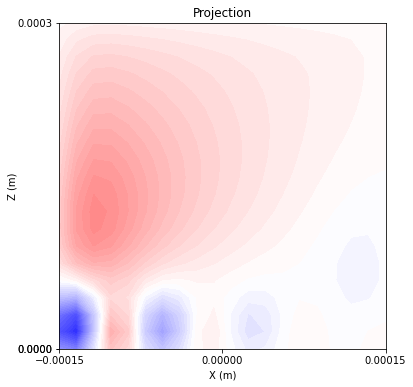

In [84]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
t_max = np.max(abs(projection))
pf.make_subplot(ax, projection.reshape(X.shape), 'csd', X, Y, Z, t_max, idx=4, fig_title='Projection')

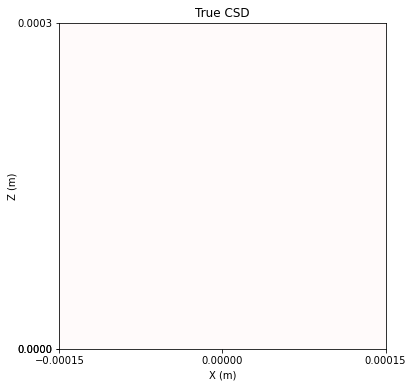

In [86]:
#src_nr = 0
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
t_max = np.max(abs(true_csd[src_nr].values))
pf.make_subplot(ax, true_csd[src_nr].values.reshape(X.shape), 'csd', X, Y, Z, t_max, idx=4, fig_title='True CSD')

In [87]:
# Reconstruction without regularization
est_csd = cross_reconstructor(potential[src_nr], np.array([0]))

In [88]:
est_csd.shape

(8000,)

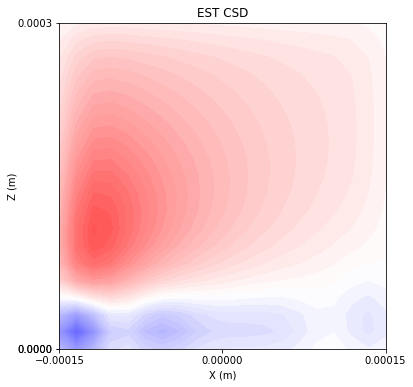

In [90]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
t_max = np.max(abs(est_csd))
pf.make_subplot(ax, est_csd.reshape(X.shape), 'csd', X, Y, Z, t_max, idx=4, fig_title='EST CSD')